In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
import seaborn as sns

In [2]:
geo_data = pd.read_csv('Data\olist_geolocation_dataset.csv')
geo_data.columns

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Machiavelli127\AppData\Local\Temp\ipykernel_18476\2690869845.py:1: SyntaxWarning: invalid escape sequence '\o'
  geo_data = pd.read_csv('Data\olist_geolocation_dataset.csv')


Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [3]:
geo_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_data = pd.read_csv('Data\olist_orders_dataset.csv')
order_payment_data = pd.read_csv('Data\olist_order_payments_dataset.csv')
order_item_data = pd.read_csv('Data\olist_order_items_dataset.csv')
products_data = pd.read_csv('Data\olist_products_dataset.csv')
order_reviews_data = pd.read_csv('Data\olist_order_reviews_dataset.csv')
customer_data = pd.read_csv('Data\olist_customers_dataset.csv')
seller_data = pd.read_csv('Data\olist_sellers_dataset.csv')

translation_data = pd.read_csv('Data\product_category_name_translation.csv')

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:9: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Machiavelli127\AppData\Local\Temp\ipykernel_18476\1418893279.py:1: SyntaxWarning: invalid escape sequence '\o'
  order_data = pd.read_csv('Data\olist_orders_dataset.csv')
C:\Users\Machiavelli

## Which product category has lower scores ?

In [5]:
merged_data_1 = pd.merge(order_reviews_data, order_item_data, on='order_id')
merged_data_2 = pd.merge(merged_data_1, products_data, on='product_id')
review_scores_product = pd.merge(merged_data_2, translation_data, on='product_category_name')

review_scores_product = review_scores_product[['product_id', 'product_category_name_english', 'review_score']]
review_scores_product.head()

,product_id,product_category_name_english,review_score
0,fd25ab760bfbba13c198fa3b4f1a0cd3,sports_leisure,4
1,fd25ab760bfbba13c198fa3b4f1a0cd3,sports_leisure,4
2,be0dbdc3d67d55727a65d4cd696ca73c,computers_accessories,5
3,d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories,5
4,52c80cedd4e90108bf4fa6a206ef6b03,garden_tools,5


In [6]:
avg_score_per_category = review_scores_product.groupby('product_category_name_english', as_index=False).agg({'review_score': ['mean', 'count']})
avg_score_per_category.columns = ['product_category_name_english', 'mean', 'count']

# Filtering để chỉ hiện các category với hơn 100 reviews
avg_score_per_category = avg_score_per_category[avg_score_per_category['count'] > 500]
avg_score_per_category = avg_score_per_category.sort_values(by='mean', ascending=False)

avg_score_per_category

,product_category_name_english,mean,count
8,books_general_interest,4.446266,549
53,luggage_accessories,4.315257,1088
66,stationery,4.193857,2507
60,pet_shop,4.185147,1939
44,home_appliances,4.172457,806
59,perfumery,4.161941,3421
69,toys,4.158641,4091
56,musical_instruments,4.152593,675
63,small_appliances,4.149188,677
20,cool_stuff,4.146341,3772


C:\Users\Machiavelli127\AppData\Local\Temp\ipykernel_18476\424918333.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  category_review_score = sns.barplot(x="mean", y = "product_category_name_english", data=avg_score_per_category, palette='pastel')


Text(0.5, 1.0, 'Categories Review Score')

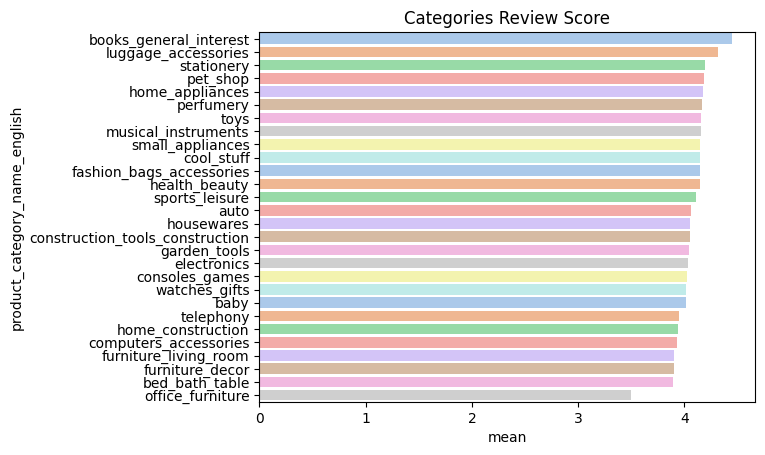

In [7]:
category_review_score = sns.barplot(x="mean", y = "product_category_name_english", data=avg_score_per_category, palette='pastel')
category_review_score.set_title('Categories Review Score')

## Feature engineering with time

In [8]:
order_data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [9]:
order_data['order_delivered_customer_date']=order_data['order_delivered_customer_date'].fillna(method='ffill')
order_data['order_delivered_customer_date'].isnull().sum()

C:\Users\Machiavelli127\AppData\Local\Temp\ipykernel_18476\2149790424.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  order_data['order_delivered_customer_date']=order_data['order_delivered_customer_date'].fillna(method='ffill')


0

In [10]:
order_data['delivered_time']=pd.to_datetime(order_data['order_delivered_customer_date'],
                                            format='%Y-%m-%d %H:%M:%S').dt.date
order_data['estimate_time']=pd.to_datetime(order_data['order_estimated_delivery_date'], 
                                           format='%Y-%m-%d %H:%M:%S').dt.date

In [11]:
order_data['weekly']=pd.to_datetime(order_data['order_delivered_customer_date'],
                                    format='%Y-%m-%d %H:%M:%S').dt.isocalendar().week

In [12]:
import datetime

def week_to_month(week_num, year):
    first_day = datetime.date(year, 1, 1)
    days_since_start = (week_num - 1) * 7
    week_day = first_day + datetime.timedelta(days=days_since_start)
    return week_day.month

order_data['year'] = pd.to_datetime(order_data['order_delivered_customer_date'], errors='coerce').dt.year

# Tạo cột 'monthly' dựa trên 'weekly' và 'year'
order_data['monthly'] = order_data.apply(lambda row: week_to_month(row['weekly'], row['year']), axis=1)

order_data['monthly'] = pd.to_datetime(order_data['monthly'], format='%m').dt.month
order_data['monthly']

0        10
1         8
2         8
3        11
4         2
         ..
99436     3
99437     2
99438     9
99439     1
99440     3
Name: monthly, Length: 99441, dtype: int32

In [13]:
order_data['yearly']=pd.to_datetime(order_data['order_delivered_customer_date'])\
                    .dt.to_period('M')
order_data['yearly']= order_data['yearly'].astype(str)

In [14]:
order_data['diff_days']= (order_data['delivered_time']-order_data['estimate_time'])
#order_data['diff_days']= order_data['diff_days'].dt.days
order_data['diff_days']=order_data['diff_days'].fillna(0).dt.days
order_data['diff_days']

C:\Users\Machiavelli127\AppData\Local\Temp\ipykernel_18476\466451825.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  order_data['diff_days']=order_data['diff_days'].fillna(0).dt.days


0        -8
1        -6
2       -18
3       -13
4       -10
         ..
99436   -11
99437    -2
99438    -6
99439   -21
99440   -18
Name: diff_days, Length: 99441, dtype: int64

Text(0.5, 1.0, 'Average Difference Days per Month')

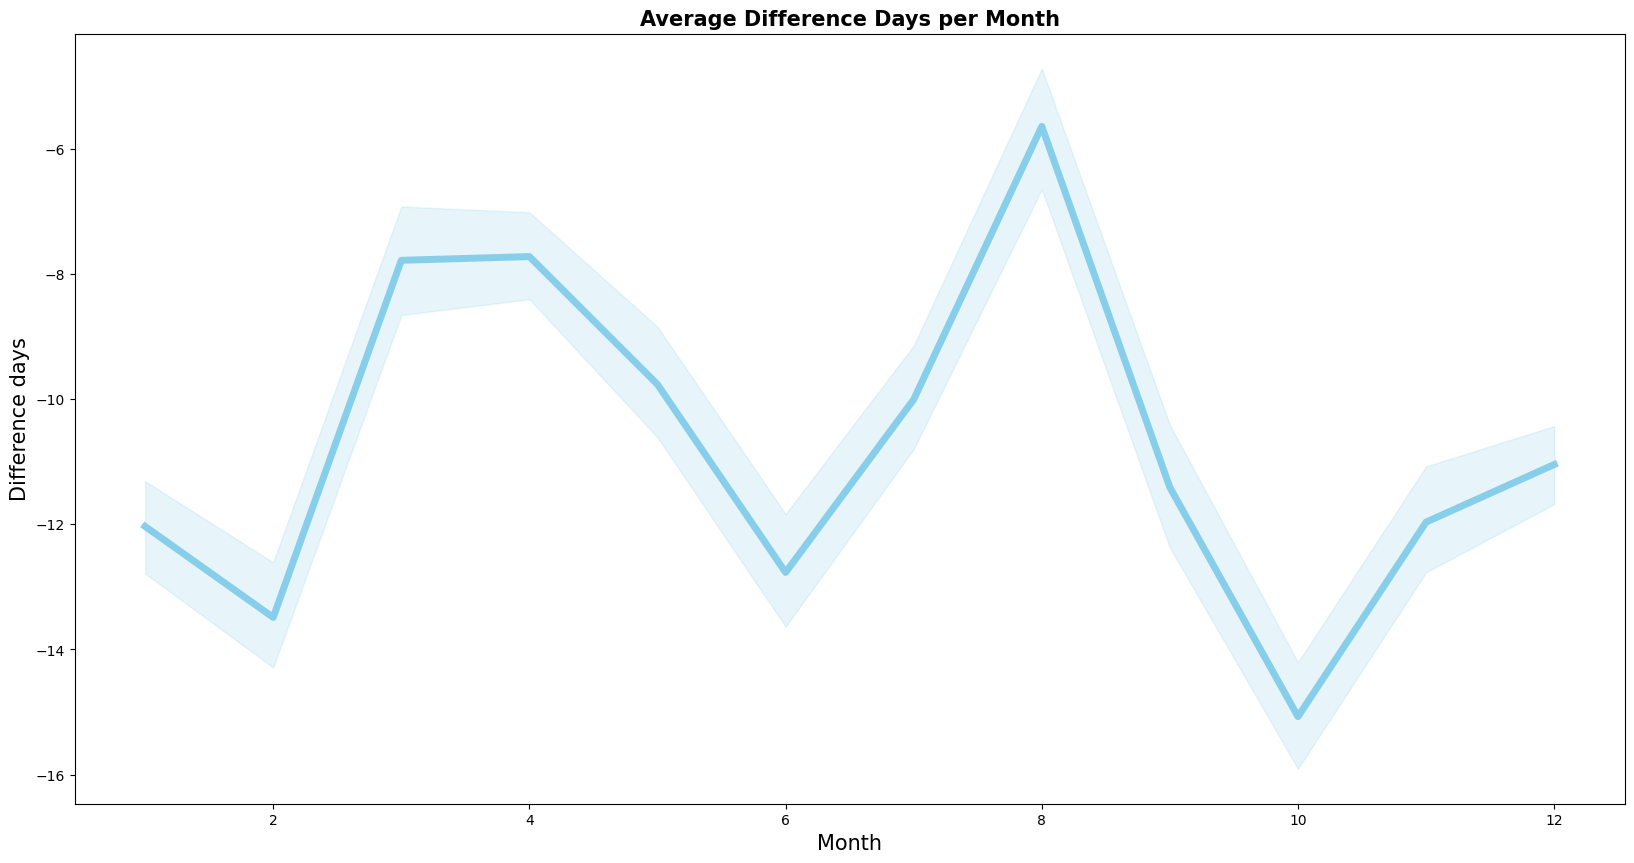

In [15]:
plt.figure(figsize=(20,10))
sns.lineplot(x='monthly', y='diff_days', data=order_data, color="skyblue", linewidth=5,
            markers=True,dashes=False, estimator='mean')
plt.xlabel('Month', size=15)
plt.ylabel('Difference days', size=15)
plt.title("Average Difference Days per Month", size = 15, weight='bold')

## Top products

In [16]:
total_order = pd.merge(order_data, order_item_data, on='order_id')

merge_1 = pd.merge(total_order, products_data, on='product_id')
products_order = pd.merge(translation_data, merge_1, on='product_category_name')
products_order.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111023 entries, 0 to 111022
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_category_name          111023 non-null  object 
 1   product_category_name_english  111023 non-null  object 
 2   order_id                       111023 non-null  object 
 3   customer_id                    111023 non-null  object 
 4   order_status                   111023 non-null  object 
 5   order_purchase_timestamp       111023 non-null  object 
 6   order_approved_at              111009 non-null  object 
 7   order_delivered_carrier_date   109868 non-null  object 
 8   order_delivered_customer_date  111023 non-null  object 
 9   order_estimated_delivery_date  111023 non-null  object 
 10  delivered_time                 111023 non-null  object 
 11  estimate_time                  111023 non-null  object 
 12  weekly                        

In [17]:
len(products_order['product_id'].unique())      
len(products_order['product_category_name_english'].unique())

71

C:\Users\Machiavelli127\AppData\Local\Temp\ipykernel_18476\399310299.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_category_name_english', data=products_order[products_order['product_category_name_english'].isin(top_categories.index)], palette='pastel',


Text(0.5, 1.0, 'Top 10 Product Categories')

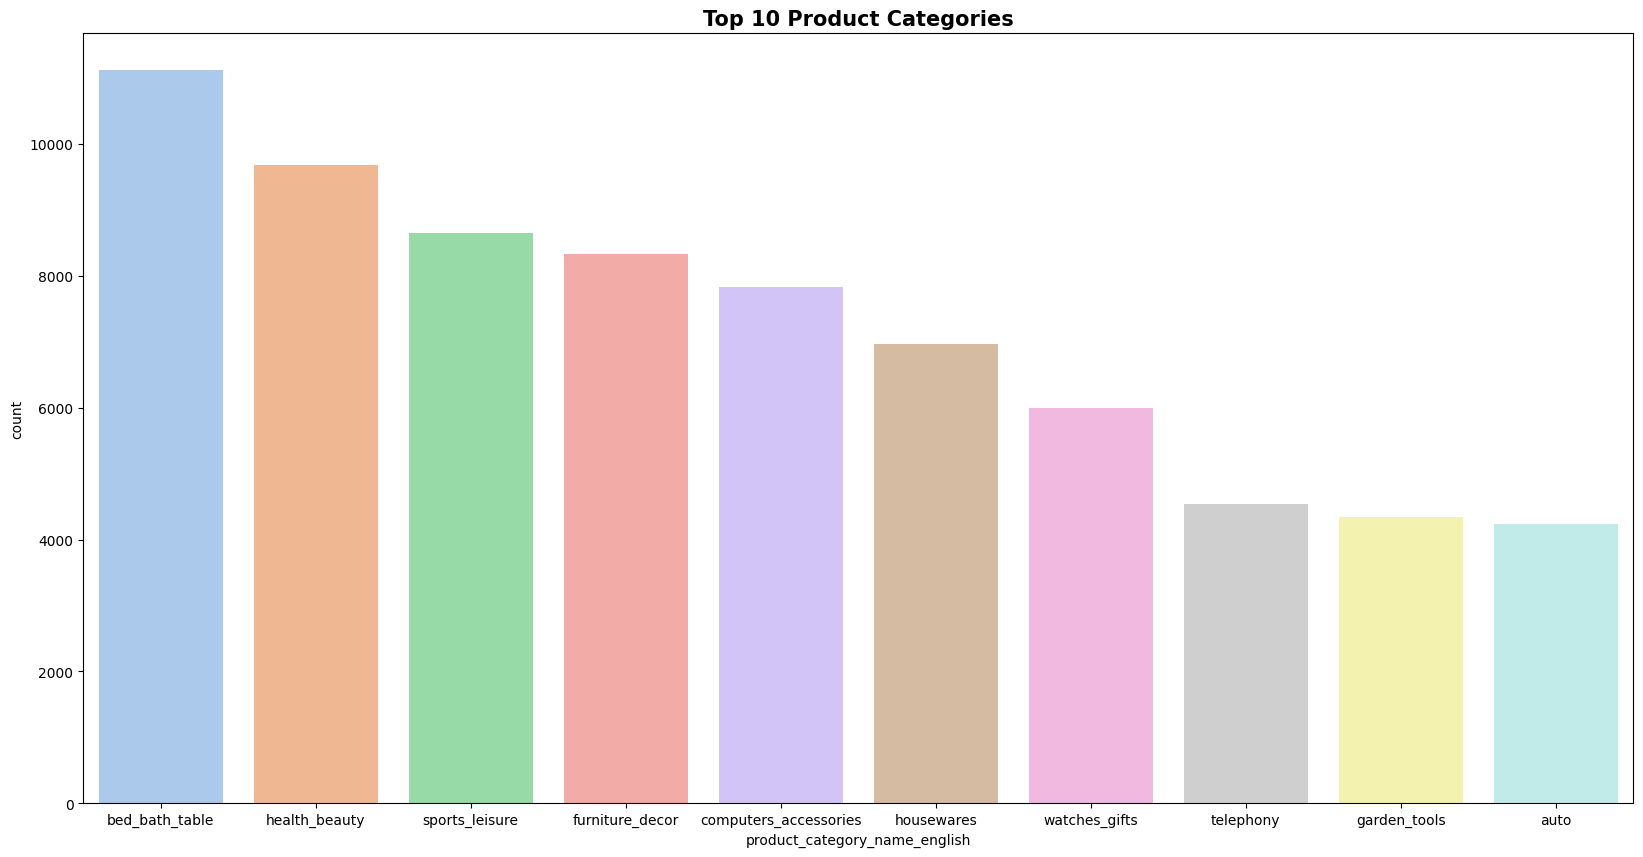

In [18]:
# Calculate top 10 product categories
top_categories = products_order.groupby(["product_category_name_english"])["product_id"].count().sort_values(ascending=False).head(10)

# Plotting top 10 product categories
plt.figure(figsize=(20,10))
sns.countplot(x='product_category_name_english', data=products_order[products_order['product_category_name_english'].isin(top_categories.index)], palette='pastel',
             order=top_categories.index).set_title("Top 10 Product Categories", fontsize=15,
                                             weight='bold')

## Gross Profit

In [19]:
seller_products = pd.merge(products_order, seller_data, on='seller_id')
seller_products.head()

,product_category_name,product_category_name_english,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,beleza_saude,health_beauty,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28 00:00:00,...,46.0,2345.0,6.0,525.0,21.0,16.0,13.0,4438,sao paulo,SP
1,beleza_saude,health_beauty,f848643eec1d69395095eb3840d2051e,4fa1cd166fa598be6de80fa84eaade43,delivered,2018-03-15 08:52:40,2018-03-15 09:09:31,2018-03-15 19:52:48,2018-03-19 18:08:32,2018-03-29 00:00:00,...,59.0,492.0,3.0,250.0,22.0,10.0,18.0,9015,santo andre,SP
2,beleza_saude,health_beauty,434d158e96bdd6972ad6e6d73ddcfd22,2a1dfb647f32f4390e7b857c67458536,delivered,2018-06-01 12:23:13,2018-06-05 03:35:15,2018-06-08 11:49:00,2018-06-18 21:32:52,2018-07-17 00:00:00,...,28.0,1455.0,1.0,683.0,29.0,15.0,22.0,87303,campo mourao,PR
3,beleza_saude,health_beauty,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,2018-08-13 23:34:42,2018-06-28 00:00:00,...,59.0,1782.0,1.0,125.0,25.0,14.0,18.0,11701,praia grande,SP
4,beleza_saude,health_beauty,974c1993ab8024d3ed16229183c2308d,a90391a47de936d56c66a5366cba1462,delivered,2017-02-20 11:45:39,2017-02-22 03:10:20,2017-02-23 06:47:35,2017-03-09 14:27:58,2017-03-21 00:00:00,...,47.0,1346.0,2.0,500.0,20.0,8.0,20.0,20756,rio de janeiro,RJ


In [20]:
payments = pd.merge(order_payment_data, seller_products, on = 'order_id')
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_category_name_english,customer_id,order_status,order_purchase_timestamp,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,casa_construcao,home_construction,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,...,57.0,921.0,8.0,800.0,17.0,27.0,17.0,13321,salto,SP
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,automotivo,auto,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,...,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,4660,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,perfumaria,perfumery,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,...,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,9015,santo andre,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,cama_mesa_banho,bed_bath_table,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,...,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405,piracicaba,SP
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,cama_mesa_banho,bed_bath_table,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,...,54.0,120.0,1.0,835.0,40.0,9.0,33.0,14940,ibitinga,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115873,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,construcao_ferramentas_iluminacao,construction_tools_lights,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,...,31.0,309.0,1.0,13450.0,95.0,30.0,20.0,15081,sao jose do rio preto,SP
115874,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,papelaria,stationery,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,...,52.0,211.0,2.0,7000.0,60.0,20.0,30.0,13232,campo limpo paulista,SP
115875,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,automotivo,auto,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,...,47.0,577.0,2.0,120.0,16.0,8.0,11.0,8041,sao paulo,SP
115876,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,beleza_saude,health_beauty,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,...,42.0,3902.0,7.0,500.0,22.0,6.0,16.0,35162,ipatinga,MG


In [21]:
# Loại mấy cột thừa thãi
payments = payments.drop(columns = ['product_name_lenght','product_description_lenght',
                                 'product_photos_qty','product_weight_g','product_length_cm',
                                 'product_height_cm','product_width_cm'])
payments.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_category_name_english,customer_id,order_status,order_purchase_timestamp,...,diff_days,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,casa_construcao,home_construction,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,...,-13,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,13321,salto,SP
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,automotivo,auto,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,...,-17,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,4660,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,perfumaria,perfumery,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,...,-17,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,9015,santo andre,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,cama_mesa_banho,bed_bath_table,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,...,-14,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,13405,piracicaba,SP
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,cama_mesa_banho,bed_bath_table,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,...,-12,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88,14940,ibitinga,SP


In [22]:
price_details = payments.groupby(['order_id','price','product_category_name_english', 'yearly', 'weekly'])[['freight_value', 'payment_value']].sum().reset_index()
price_details.head()

,order_id,price,product_category_name_english,yearly,weekly,freight_value,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,cool_stuff,2017-09,38,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,239.90,pet_shop,2017-05,19,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,199.00,furniture_decor,2018-01,4,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,perfumery,2018-08,33,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,garden_tools,2017-03,9,18.14,218.04


In [23]:
# Giá đơn hàng = price + freight_value
price_details['total_order'] = price_details['price'] + price_details['freight_value']

# Tính Gross Profit và Profit Margin
price_details['gross_profit'] = price_details['payment_value']- price_details['total_order']
price_details['profit_margin'] = price_details['gross_profit']/price_details['payment_value']
price_details['profit_margin'] = price_details['profit_margin'].astype('int64')

In [24]:
price_details.sort_values('gross_profit', ascending=False).head(10)

,order_id,price,product_category_name_english,yearly,weekly,freight_value,payment_value,total_order,gross_profit,profit_margin
1466,03caa2c082116e1d31e67e9ae3700499,1680.00,fixed_telephony,2017-10,42,224.08,109312.64,1904.08,107408.56,0
66507,ab14fdcfbe524636d65ee38360e22ce8,98.70,auto,2017-09,35,288.80,45256.00,387.50,44868.50,0
10547,1b15974a0141d54e36626dca3fdc731a,100.00,computers_accessories,2018-03,10,202.40,44048.00,302.40,43745.60,0
17258,2cc9089445046817a7539d90805e6e5a,989.10,agro_industry_and_commerce,2017-12,50,146.94,36489.24,1136.04,35353.20,0
90919,e8fa22c3673b1dd17ea315021b1f0f61,284.99,drinks,2018-05,18,168.70,30186.00,453.69,29732.31,0
44981,736e1922ae60d0d6a89247b851902527,1790.00,fixed_telephony,2018-07,30,114.88,29099.52,1904.88,27194.64,0
25839,428a2f660dc84138d969ccd69a0ab6d5,65.49,furniture_decor,2017-12,50,243.30,18384.75,308.79,18075.96,0
22588,3a213fcdfe7d98be74ea0dc05a8b31ae,108.00,watches_gifts,2018-01,4,186.24,17786.88,294.24,17492.64,0
96725,f80549a97eb203e1566e026ab66f045b,137.90,computers_accessories,2017-09,39,388.10,17671.00,526.00,17145.00,0
26442,4412d97cb2093633afa85f11db46316c,120.00,computers_accessories,2018-06,23,83.99,15978.65,203.99,15774.66,0


Text(0.5, 1.0, 'Gross Profit of top 5 products')

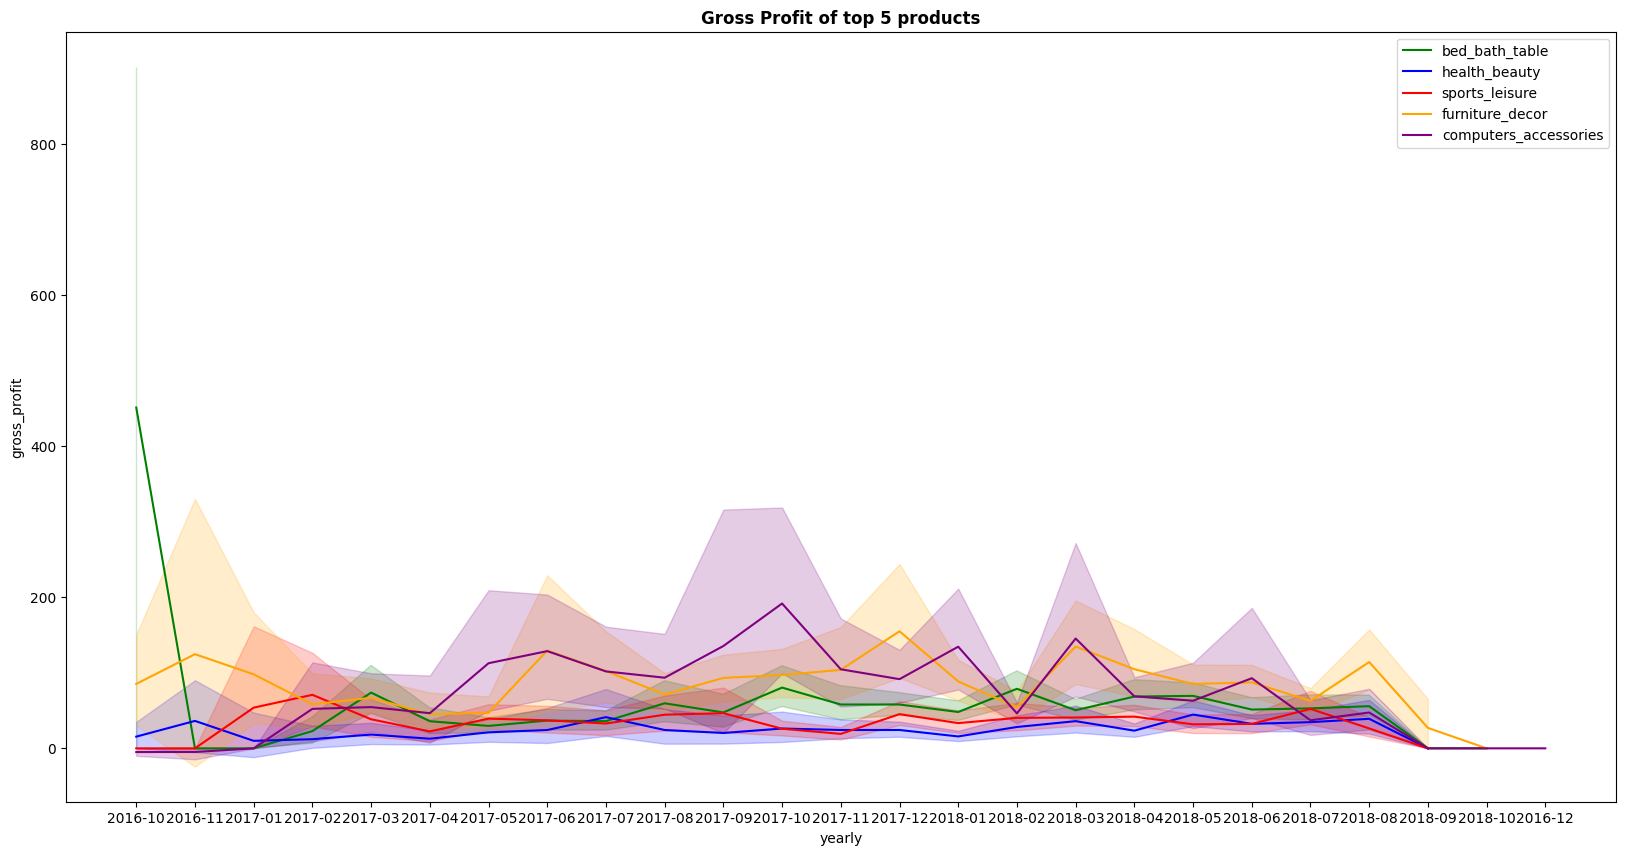

In [25]:
plt.figure(figsize=(20,10))
price_details = price_details.sort_values('yearly')

sns.lineplot(x='yearly', y='gross_profit', data = price_details[price_details['product_category_name_english'] == 'bed_bath_table'], label = 'bed_bath_table', color = "green")
sns.lineplot(x='yearly', y='gross_profit', data = price_details[price_details['product_category_name_english'] =='health_beauty'], label = 'health_beauty', color = "blue")
sns.lineplot(x='yearly', y='gross_profit', data = price_details[price_details['product_category_name_english'] =='sports_leisure'], label = 'sports_leisure', color = "red")
sns.lineplot(x='yearly', y='gross_profit', data = price_details[price_details['product_category_name_english'] =='furniture_decor'], label = 'furniture_decor', color = "orange")
sns.lineplot(x='yearly', y='gross_profit', data = price_details[price_details['product_category_name_english'] =='computers_accessories'], label = 'computers_accessories', color = "purple")

plt.title("Gross Profit of top 5 products", fontweight = 'bold')



## Frequency of orders during hour over day 

In [26]:
# Creat new columns for date, day, time, month
order_data['weekday'] = pd.to_datetime(order_data['order_purchase_timestamp'],
                                            format='%Y-%m-%d %H:%M:%S').dt.weekday
order_data['year']= pd.to_datetime(order_data['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S').dt.year
order_data['monthday']= pd.to_datetime(order_data['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S').dt.day
order_data['weekday'] =  pd.to_datetime(order_data['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S').dt.weekday
order_data['month']= pd.to_datetime(order_data['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S').dt.month
order_data['hour']= pd.to_datetime(order_data['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S').dt.hour

In [27]:
day_hour = order_data.groupby(['weekday','hour']).agg({'order_id':'count'}).rename(columns={'order_id':'trans'}).reset_index()

In [28]:
weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
day_hour.weekday = day_hour.weekday.map(weekmap)
day_hour.head()


,weekday,hour,trans
0,Mon,0,328
1,Mon,1,134
2,Mon,2,66
3,Mon,3,36
4,Mon,4,21


In [29]:
day_hour['weekday']=pd.Categorical(day_hour['weekday'],categories=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],ordered=True)

In [30]:
day_hour= day_hour.pivot(index='weekday', columns='hour', values='trans')


Text(0.5, 1.0, 'Heatmap of tranactions over the hour by day')

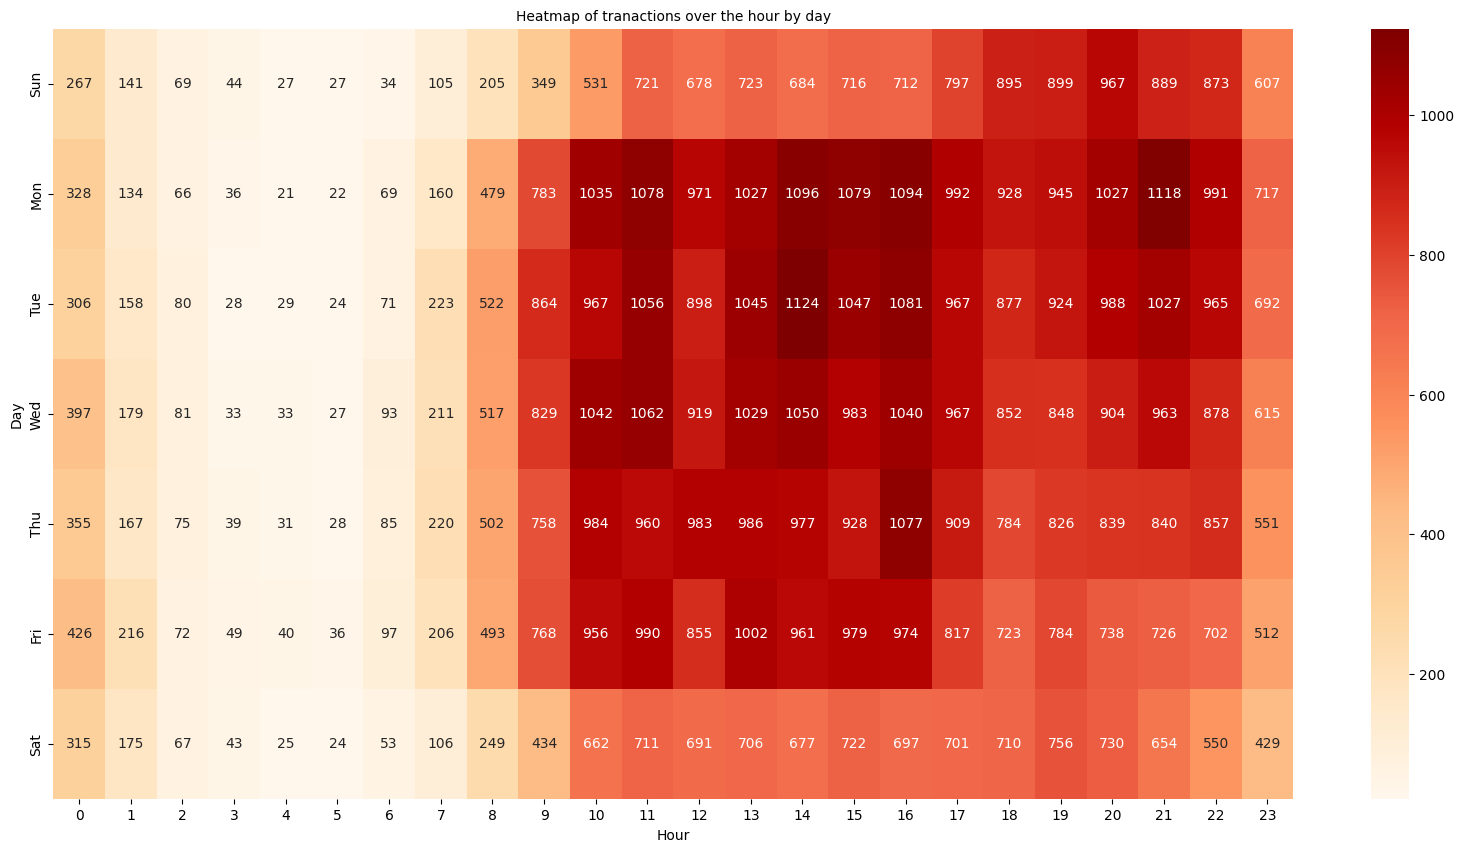

In [33]:
# Heatmap
plt.figure(figsize=(20,10))
ax = sns.heatmap(day_hour, annot=True, fmt='d', cmap= 'OrRd')
ax.set_xlabel('Hour')
ax.set_ylabel('Day')
ax.set_title("Heatmap of tranactions over the hour by day",size=10)

In [9]:
import pandas as pd
import re
from unidecode import unidecode

# Function to clean the city names
def clean_city(name):
    name = unidecode(name)
    name = re.sub(r'[^a-zA-Z\s]', '', name)
    return name

df = pd.read_csv('Data\olist_geolocation_dataset.csv')

df['cleaned_city'] = df['geolocation_city'].apply(clean_city)

filtered_df = df[df['geolocation_city'] != df['cleaned_city']]

filtered_df[['geolocation_city', 'cleaned_city']]



<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Machiavelli127\AppData\Local\Temp\ipykernel_12804\1667558850.py:11: SyntaxWarning: invalid escape sequence '\o'
  df = pd.read_csv('Data\olist_geolocation_dataset.csv')


,geolocation_city,cleaned_city
5,são paulo,sao paulo
14,são paulo,sao paulo
17,são paulo,sao paulo
21,são paulo,sao paulo
22,são paulo,sao paulo
...,...,...
1000094,ibiaçá,ibiaca
1000096,getúlio vargas,getulio vargas
1000098,getúlio vargas,getulio vargas
1000143,estação,estacao


,geolocation_city,cleaned_city
5,são paulo,sao paulo
14,são paulo,sao paulo
17,são paulo,sao paulo
21,são paulo,sao paulo
22,são paulo,sao paulo
...,...,...
1000094,ibiaçá,ibiaca
1000096,getúlio vargas,getulio vargas
1000098,getúlio vargas,getulio vargas
1000143,estação,estacao
